In [27]:
# Issue topic: Skeletonising horse image from sample code example in 'skimage' tool or scikit-image tool: https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_skeleton.html

# Issue description: https://github.com/neuroinformatics-unit/osw25-hackday/issues/7

In [28]:
# Importing libraries (for computation and graph plotting) and sample data

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
%matplotlib widget
import numpy as np

In [ ]:
# Worm image:

# Reading/Importing the 'masked' worm image
from PIL import Image

# Open the image
img = Image.open("https://github.com/pwetterauer/neuroinformatics-unit.github.io/blob/fcbf52a08f8d5570900deea5250b5f0152cab651/docs/source/_static/blog_images/sam2/input_masked_images/EGCG5_40_2018_10_19_Mask.tif")

# Display the image
img.show()

In [29]:
# Convert masked worm .tif image to numpy array object
import numpy as np
img_worm = np.array(img)
print(img_worm.shape)
print(img_worm.dtype)
print(img_worm)

(1200, 1920)
uint8
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
# Skeletonising the worm
skeleton_worm = skeletonize(img_worm)
print(type(skeleton_worm))
print(skeleton_worm)

<class 'numpy.ndarray'>
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


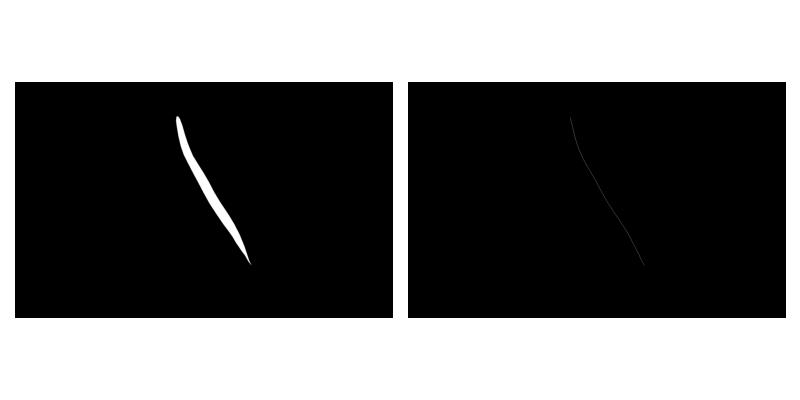

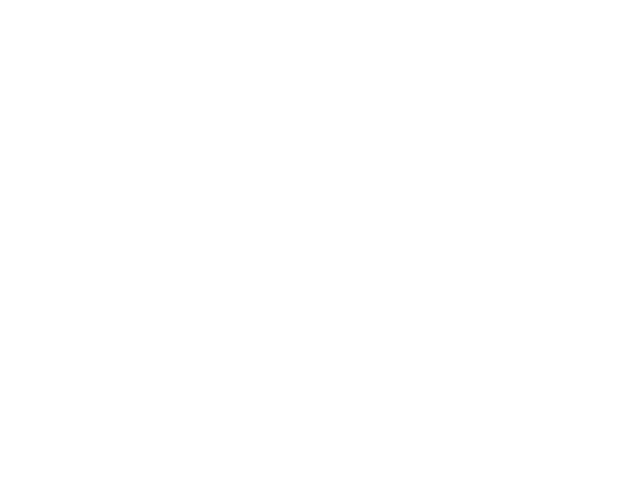

In [31]:
# Visualising the full masked image and the skeleton for worm

plt.figure()
# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()
# Note: Does nothing that is displayed

ax[0].imshow(img_worm, cmap=plt.cm.gray)
ax[0].axis('off')

# Repeating the above the steps/cells for image on right
ax[1].imshow(skeleton_worm, cmap=plt.cm.gray)
ax[1].axis('off')

fig.tight_layout()
plt.show()

In [32]:
np.sum(skeleton_worm)

np.int64(752)

In [33]:
# Extracting nodes for the worm skeleton

worm_index_true = np.argwhere(skeleton_worm)
print(type(worm_index_true))
print(worm_index_true.shape)
print(worm_index_true.dtype)
print(worm_index_true)

# alternative way to view the above information
worm_index_true.view()

<class 'numpy.ndarray'>
(752, 2)
int64
[[ 180  824]
 [ 181  824]
 [ 182  825]
 ...
 [ 929 1199]
 [ 930 1199]
 [ 931 1200]]


array([[ 180,  824],
       [ 181,  824],
       [ 182,  825],
       ...,
       [ 929, 1199],
       [ 930, 1199],
       [ 931, 1200]], shape=(752, 2))

In [ ]:
# Step 1: Determine sample size (10%)
# sample_size = int(0.1 * len(worm_index_true))
# sample_size = max(sample_size, 1)  # ensure at least one point
# print(f"Sample size: {sample_size}")

# Step 2: Randomly select without replacement
# Define nodes as 5 worm pixels randomly sampled (without replacement)
rng = np.random.default_rng(seed=42) # set a seed for reproducibility
sample_indices = rng.choice(len(worm_index_true), size=5, replace=False)    
print(f"Sample indices: {sample_indices}")

# Step 3: Extract sampled worm_index_true
# Get rows (y-coordinate) and columns (x-coordinate) of the nodes in the skeleton_worm array
sampled_worm_index_true = worm_index_true[sample_indices, :]
print("Shape of Sampled points:\n", sampled_worm_index_true.shape)
print("Indices of Sampled points:\n", sampled_worm_index_true)


# Step 4: Print the sampled points from the skeleton_worm array
nodes = skeleton_worm[sampled_worm_index_true[:,0], sampled_worm_index_true[:,1]]
print("The sampled points are:\n", nodes)
print(nodes.shape)
print(type(nodes))

Sample size: 75
Sample indices: [176 751 445 309   1]
Shape of Sampled points:
 (5, 2)
Indices of Sampled points:
 [[ 356  873]
 [ 931 1200]
 [ 625 1022]
 [ 489  945]
 [ 181  824]]
The sampled points are:
 [ True  True  True  True  True]
(5,)
<class 'numpy.ndarray'>


In [35]:
sum_nodes = np.sum(nodes)
print(f"Sum of sampled skeleton nodes: {sum_nodes}")    

Sum of sampled skeleton nodes: 5


In [36]:
print(sampled_worm_index_true.shape)
print(skeleton_worm.shape)

(5, 2)
(1200, 1920)


In [37]:
sum_skeleton = np.sum(nodes)
print(f"Sum of sampled skeleton nodes: {sum_skeleton}")

Sum of sampled skeleton nodes: 5


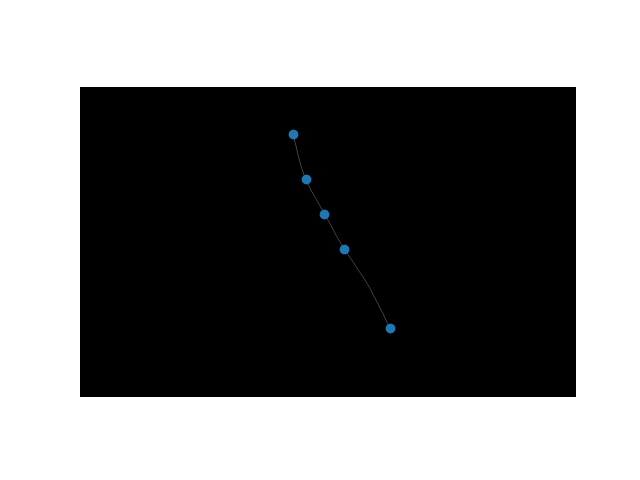

In [ ]:
# Scatter plot of nodes of the skeleton of worm
plt.figure()
plt.imshow(skeleton_worm, cmap=plt.cm.gray)
plt.axis('off')
plt.scatter(sampled_worm_index_true[:,1],sampled_worm_index_true[:,0])